In [11]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl


## Variables

In [12]:
systolic = ctrl.Antecedent(universe = np.arange(70, 190, 1), label = 'Systolic')
diastolic = ctrl.Antecedent(universe = np.arange(40, 100, 1), label = 'Diastolic')
temperature = ctrl.Antecedent(universe = np.arange(98, 106, 1), label = 'temperature')

health_cond = ctrl.Consequent(universe=np.arange(0,1,0.1), label='health condition', defuzzify_method='centroid')

## Subsets & Membership functions

In [13]:
systolic['low'] = fuzz.trimf(systolic.universe, [70, 80, 90])
systolic['ideal'] = fuzz.trimf(systolic.universe, [80, 100, 120])
systolic['pre-high'] = fuzz.trimf(systolic.universe, [100, 120, 140])
systolic['high'] = fuzz.trimf(systolic.universe, [130, 160, 190])

diastolic['low'] = fuzz.trimf(diastolic.universe, [40, 50, 60])
diastolic['ideal'] = fuzz.trimf(diastolic.universe, [50, 65, 80])
diastolic['pre-high'] = fuzz.trimf(diastolic.universe, [65, 77.5, 90])
diastolic['high'] = fuzz.trimf(diastolic.universe, [80, 90, 100])

temperature['low'] = fuzz.trimf(temperature.universe, [98, 98, 100])
temperature['normal'] = fuzz.trimf(temperature.universe, [98, 100, 102])
temperature['high1'] = fuzz.trimf(temperature.universe, [100, 102, 104])
temperature['high2'] = fuzz.trimf(temperature.universe, [102, 104, 106])
temperature['emergency'] = fuzz.trimf(temperature.universe, [104, 106, 106])

# continue
health_cond['un-well']
health_cond['good']
health_cond['normal']
health_cond['worst']

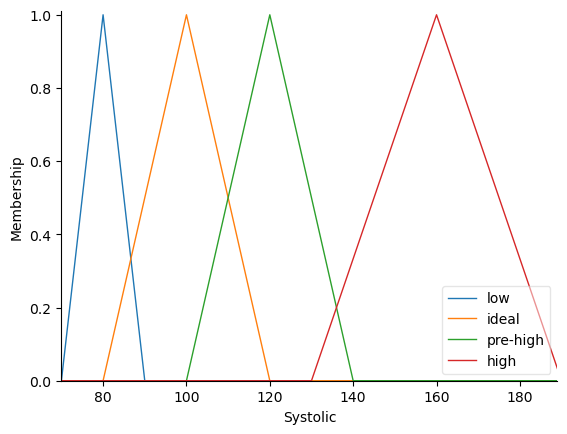

In [16]:
systolic.view()

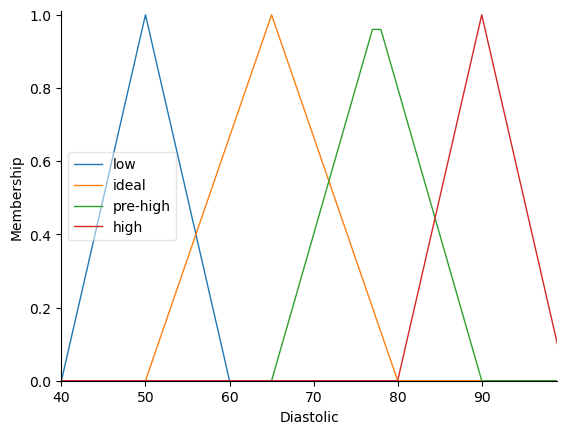

In [17]:
diastolic.view()

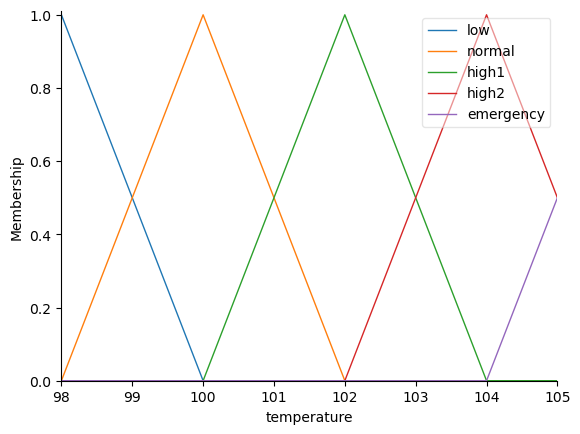

In [18]:
temperature.view()

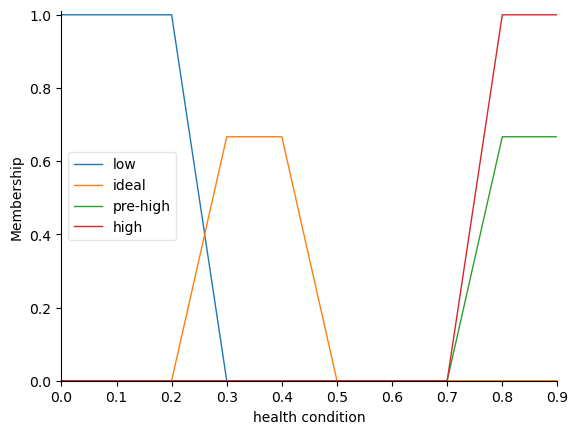

In [19]:
health_cond.view()

## Fuzzy rules

In [21]:
rule1=ctrl.Rule(systolic['low'] & diastolic['low'] & temperature['low'], health_cond['un-well'])
rule2=ctrl.Rule(systolic['low'] & diastolic['low'] & temperature['normal'], health_cond['un-well'])
rule3=ctrl.Rule(systolic['low'] & diastolic['low'] & temperature['high1'], health_cond['good'])
rule4=ctrl.Rule(systolic['low'] & diastolic['low'] & temperature['high2'], health_cond['good'])
rule5=ctrl.Rule(systolic['low'] & diastolic['low'] & temperature['emergency'], health_cond['good'])

rule6=ctrl.Rule(systolic['low'] & diastolic['ideal'] & temperature['low'], health_cond['un-well'])
rule7=ctrl.Rule(systolic['low'] & diastolic['ideal'] & temperature['normal'], health_cond['un-well'])
rule8=ctrl.Rule(systolic['low'] & diastolic['ideal'] & temperature['high1'], health_cond['good'])
rule9=ctrl.Rule(systolic['low'] & diastolic['ideal'] & temperature['high2'], health_cond['good'])
rule10=ctrl.Rule(systolic['low'] & diastolic['ideal'] & temperature['emergency'], health_cond['good'])

rule11=ctrl.Rule(systolic['low'] & diastolic['pre-high'] & temperature['low'], health_cond['un-well'])
rule12=ctrl.Rule(systolic['low'] & diastolic['pre-high'] & temperature['normal'], health_cond['un-well'])
rule13=ctrl.Rule(systolic['low'] & diastolic['pre-high'] & temperature['high1'], health_cond['good'])
rule14=ctrl.Rule(systolic['low'] & diastolic['pre-high'] & temperature['high2'], health_cond['good'])
rule15=ctrl.Rule(systolic['low'] & diastolic['pre-high'] & temperature['emergency'], health_cond['good'])

rule16=ctrl.Rule(systolic['low'] & diastolic['high'] & temperature['low'], health_cond['un-well'])
rule17=ctrl.Rule(systolic['low'] & diastolic['high'] & temperature['normal'], health_cond['un-well'])
rule18=ctrl.Rule(systolic['low'] & diastolic['high'] & temperature['high1'], health_cond['good'])
rule19=ctrl.Rule(systolic['low'] & diastolic['high'] & temperature['high2'], health_cond['good'])
rule20=ctrl.Rule(systolic['low'] & diastolic['high'] & temperature['emergency'], health_cond['good'])

rule21=ctrl.Rule(systolic['ideal'] & diastolic['low'] & temperature['low'], health_cond['un-well'])
rule22=ctrl.Rule(systolic['ideal'] & diastolic['low'] & temperature['normal'], health_cond['un-well'])
rule23=ctrl.Rule(systolic['ideal'] & diastolic['low'] & temperature['high1'], health_cond['good'])
rule24=ctrl.Rule(systolic['ideal'] & diastolic['low'] & temperature['high2'], health_cond['good'])
rule25=ctrl.Rule(systolic['ideal'] & diastolic['low'] & temperature['emergency'], health_cond['good'])

rule26=ctrl.Rule(systolic['ideal'] & diastolic['ideal'] & temperature['low'], health_cond['un-well'])
rule27=ctrl.Rule(systolic['ideal'] & diastolic['ideal'] & temperature['normal'], health_cond['un-well'])
rule28=ctrl.Rule(systolic['ideal'] & diastolic['ideal'] & temperature['high1'], health_cond['good'])
rule29=ctrl.Rule(systolic['ideal'] & diastolic['ideal'] & temperature['high2'], health_cond['good'])
rule30=ctrl.Rule(systolic['ideal'] & diastolic['ideal'] & temperature['emergency'], health_cond['good'])

rule31=ctrl.Rule(systolic['ideal'] & diastolic['pre-high'] & temperature['low'], health_cond['un-well'])
rule32=ctrl.Rule(systolic['ideal'] & diastolic['pre-high'] & temperature['normal'], health_cond['un-well'])
rule33=ctrl.Rule(systolic['ideal'] & diastolic['pre-high'] & temperature['high1'], health_cond['good'])
rule34=ctrl.Rule(systolic['ideal'] & diastolic['pre-high'] & temperature['high2'], health_cond['good'])
rule35=ctrl.Rule(systolic['ideal'] & diastolic['pre-high'] & temperature['emergency'], health_cond['good'])

rule36=ctrl.Rule(systolic['ideal'] & diastolic['high'] & temperature['low'], health_cond['un-well'])
rule37=ctrl.Rule(systolic['ideal'] & diastolic['high'] & temperature['normal'], health_cond['un-well'])
rule38=ctrl.Rule(systolic['ideal'] & diastolic['high'] & temperature['high1'], health_cond['good'])
rule39=ctrl.Rule(systolic['ideal'] & diastolic['high'] & temperature['high2'], health_cond['good'])
rule40=ctrl.Rule(systolic['ideal'] & diastolic['high'] & temperature['emergency'], health_cond['good'])

rule41=ctrl.Rule(systolic['pre-high'] & diastolic['low'] & temperature['low'], health_cond['un-well'])
rule42=ctrl.Rule(systolic['pre-high'] & diastolic['low'] & temperature['normal'], health_cond['un-well'])
rule43=ctrl.Rule(systolic['pre-high'] & diastolic['low'] & temperature['high1'], health_cond['good'])
rule44=ctrl.Rule(systolic['pre-high'] & diastolic['low'] & temperature['high2'], health_cond['good'])
rule45=ctrl.Rule(systolic['pre-high'] & diastolic['low'] & temperature['emergency'], health_cond['good'])

rule46=ctrl.Rule(systolic['pre-high'] & diastolic['ideal'] & temperature['low'], health_cond['un-well'])
rule47=ctrl.Rule(systolic['pre-high'] & diastolic['ideal'] & temperature['normal'], health_cond['un-well'])
rule48=ctrl.Rule(systolic['pre-high'] & diastolic['ideal'] & temperature['high1'], health_cond['good'])
rule49=ctrl.Rule(systolic['pre-high'] & diastolic['ideal'] & temperature['high2'], health_cond['good'])
rule50=ctrl.Rule(systolic['pre-high'] & diastolic['ideal'] & temperature['emergency'], health_cond['good'])

rule51=ctrl.Rule(systolic['pre-high'] & diastolic['pre-high'] & temperature['low'], health_cond['un-well'])
rule52=ctrl.Rule(systolic['pre-high'] & diastolic['pre-high'] & temperature['normal'], health_cond['un-well'])
rule53=ctrl.Rule(systolic['pre-high'] & diastolic['pre-high'] & temperature['high1'], health_cond['good'])
rule54=ctrl.Rule(systolic['pre-high'] & diastolic['pre-high'] & temperature['high2'], health_cond['good'])
rule55=ctrl.Rule(systolic['pre-high'] & diastolic['pre-high'] & temperature['emergency'], health_cond['good'])

rule56=ctrl.Rule(systolic['pre-high'] & diastolic['high'] & temperature['low'], health_cond['un-well'])
rule57=ctrl.Rule(systolic['pre-high'] & diastolic['high'] & temperature['normal'], health_cond['un-well'])
rule58=ctrl.Rule(systolic['pre-high'] & diastolic['high'] & temperature['high1'], health_cond['good'])
rule59=ctrl.Rule(systolic['pre-high'] & diastolic['high'] & temperature['high2'], health_cond['good'])
rule60=ctrl.Rule(systolic['pre-high'] & diastolic['high'] & temperature['emergency'], health_cond['good'])

rule61=ctrl.Rule(systolic['high'] & diastolic['low'] & temperature['low'], health_cond['un-well'])
rule62=ctrl.Rule(systolic['high'] & diastolic['low'] & temperature['normal'], health_cond['un-well'])
rule63=ctrl.Rule(systolic['high'] & diastolic['low'] & temperature['high1'], health_cond['good'])
rule64=ctrl.Rule(systolic['high'] & diastolic['low'] & temperature['high2'], health_cond['good'])
rule65=ctrl.Rule(systolic['high'] & diastolic['low'] & temperature['emergency'], health_cond['good'])

rule66=ctrl.Rule(systolic['high'] & diastolic['ideal'] & temperature['low'], health_cond['un-well'])
rule67=ctrl.Rule(systolic['high'] & diastolic['ideal'] & temperature['normal'], health_cond['un-well'])
rule68=ctrl.Rule(systolic['high'] & diastolic['ideal'] & temperature['high1'], health_cond['good'])
rule69=ctrl.Rule(systolic['high'] & diastolic['ideal'] & temperature['high2'], health_cond['good'])
rule70=ctrl.Rule(systolic['high'] & diastolic['ideal'] & temperature['emergency'], health_cond['good'])

rule1=ctrl.Rule(systolic['high'] & diastolic['pre-high'] & temperature['low'], health_cond['un-well'])
rule2=ctrl.Rule(systolic['high'] & diastolic['pre-high'] & temperature['normal'], health_cond['un-well'])
rule3=ctrl.Rule(systolic['high'] & diastolic['pre-high'] & temperature['high1'], health_cond['good'])
rule4=ctrl.Rule(systolic['high'] & diastolic['pre-high'] & temperature['high2'], health_cond['good'])
rule5=ctrl.Rule(systolic['high'] & diastolic['pre-high'] & temperature['emergency'], health_cond['good'])

rule1=ctrl.Rule(systolic['high'] & diastolic['high'] & temperature['low'], health_cond['un-well'])
rule2=ctrl.Rule(systolic['high'] & diastolic['high'] & temperature['normal'], health_cond['un-well'])
rule3=ctrl.Rule(systolic['high'] & diastolic['high'] & temperature['high1'], health_cond['good'])
rule4=ctrl.Rule(systolic['high'] & diastolic['high'] & temperature['high2'], health_cond['good'])
rule5=ctrl.Rule(systolic['high'] & diastolic['high'] & temperature['emergency'], health_cond['good'])

ValueError: Membership function 'good' does not exist for Consequent health condition.
Available options: 'low'; 'ideal'; 'pre-high', or 'high'.

## Control system creation & simulation

In [ ]:
# Mahmoud

## Testing